<a href="https://colab.research.google.com/github/01-Projects-In-Python/Automobiles-Price-PredictionModel/blob/main/Code_Automobiles-Prices-PreditionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AUTOMOBILE PRICE PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import string
from statistics import math
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [ ]:
names = ['mpg',  'cylinders',  'displacement',  'horsepower',  'weight',  'acceleration',  'model_year',  'origin',  'car_name']

auto = pd.read_csv('auto-mpg.data', sep = '\s+', header = None, names = names)

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


1. How to check type of a row/observation (numerical value, categorical, or missing)?

In [ ]:
auto.shape

(398, 9)

In [ ]:
null_auto = auto.isnull().sum()
print(null_auto[null_auto > 0])

Series([], dtype: int64)


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


--->> In this dataset there are no null values and we have 7 numerical variables and 2 categorical variables. First I will transform the origin variable from numerical to categorical.

In [ ]:
auto['origin'] = auto['origin'].astype('string')

I could observe that the 'horsepower' column is part of the categorical columns but according to the data shown, it should be numerical for the nature of the value, therefore, in this column, we could have missing values, so I will check if there is any special character.

In [ ]:
# Verify if we have any special character in the categorical variable 'horsepower':

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

In [ ]:
auto['horsepower'].str.strip(spec_chars).astype(bool).any()

True

In [ ]:
auto['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
auto['horsepower'].str.contains('\?').value_counts()

False    392
True       6
Name: horsepower, dtype: int64

2. Once missing values are identified, which function to use if using median value as a way to
fill in.

---> At this moment, I know that I have the categorical 'horsepower' column that should be numerical (float) and in that column, I have 6 rows with the special character '?', so I will create a subset to :
1. Delete the special characters from the subset
2. Transform the subset's column to float type
3. Validate if I will use the subset's mean or median to replace the special character in the auto data frame (boxplot).
4. Calculate the value that I will use to replace the horsepower column of the auto dataset
5. Replace the special character with the value (mean or median)

In [ ]:
# Creating the subset with a copy of the dataframe:
subset2 = auto[['horsepower']].copy()

In [ ]:
# Replace special characters for '' and later drop the row
subset2['horsepower'] = subset2['horsepower'].str.replace(r'?','', regex=True)

In [ ]:
# Replace the emphy values for nan and converting them to numeric
subset2 = subset2.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [ ]:
# Verifying the number of null values
null_subset2 = subset2.isnull().sum()
print(null_subset2[null_subset2 > 0])

horsepower    6
dtype: int64


In [ ]:
# Droping the null values
subset2.dropna(inplace=True)

In [ ]:
# Verifying the subset
subset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


<AxesSubplot:xlabel='horsepower'>

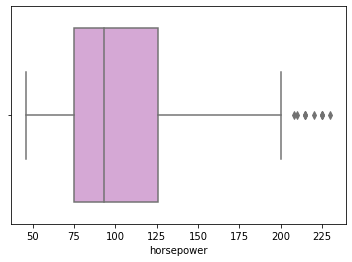

In [ ]:
# Creating the boxplot for the subset
sns.boxplot(x = 'horsepower', data = subset2, color = 'plum')

In [ ]:
# Calculating the median due to the high number of outliers in the column.
median = subset2['horsepower'].median()
median

93.5

In [ ]:
# Replacing the special character '?' in the 'horsepower' column of the auto dataset with the median value
auto['horsepower'] = auto['horsepower'].replace('?', median)

In [ ]:
# Modifying the 'horsepower' column type to float
auto['horsepower'] = auto['horsepower'].astype(float)

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    string 
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(2), object(1), string(1)
memory usage: 28.1+ KB


In [ ]:
# Creating the dummy variables for the categorical variable origin:
auto = pd.get_dummies(auto, columns=['origin'])

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,1,0,0


In [ ]:
# Final shape of the dataset:
auto.shape

(398, 11)

In [ ]:
# Final observation's type:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
 8   origin_1      398 non-null    uint8  
 9   origin_2      398 non-null    uint8  
 10  origin_3      398 non-null    uint8  
dtypes: float64(5), int64(2), object(1), uint8(3)
memory usage: 26.2+ KB


3. Identify important features using correlation tests and scatter plots

<AxesSubplot:>

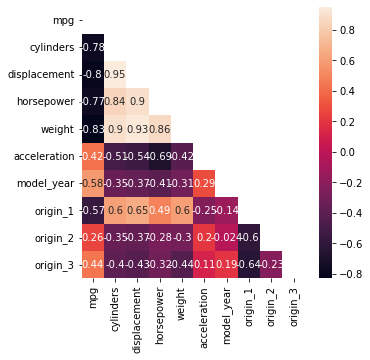

In [ ]:
auto_corr = auto.corr()
matrix = np.triu(auto_corr)
plt.figure(figsize = (5, 5))
sns.heatmap(auto_corr, annot = True, mask = matrix)

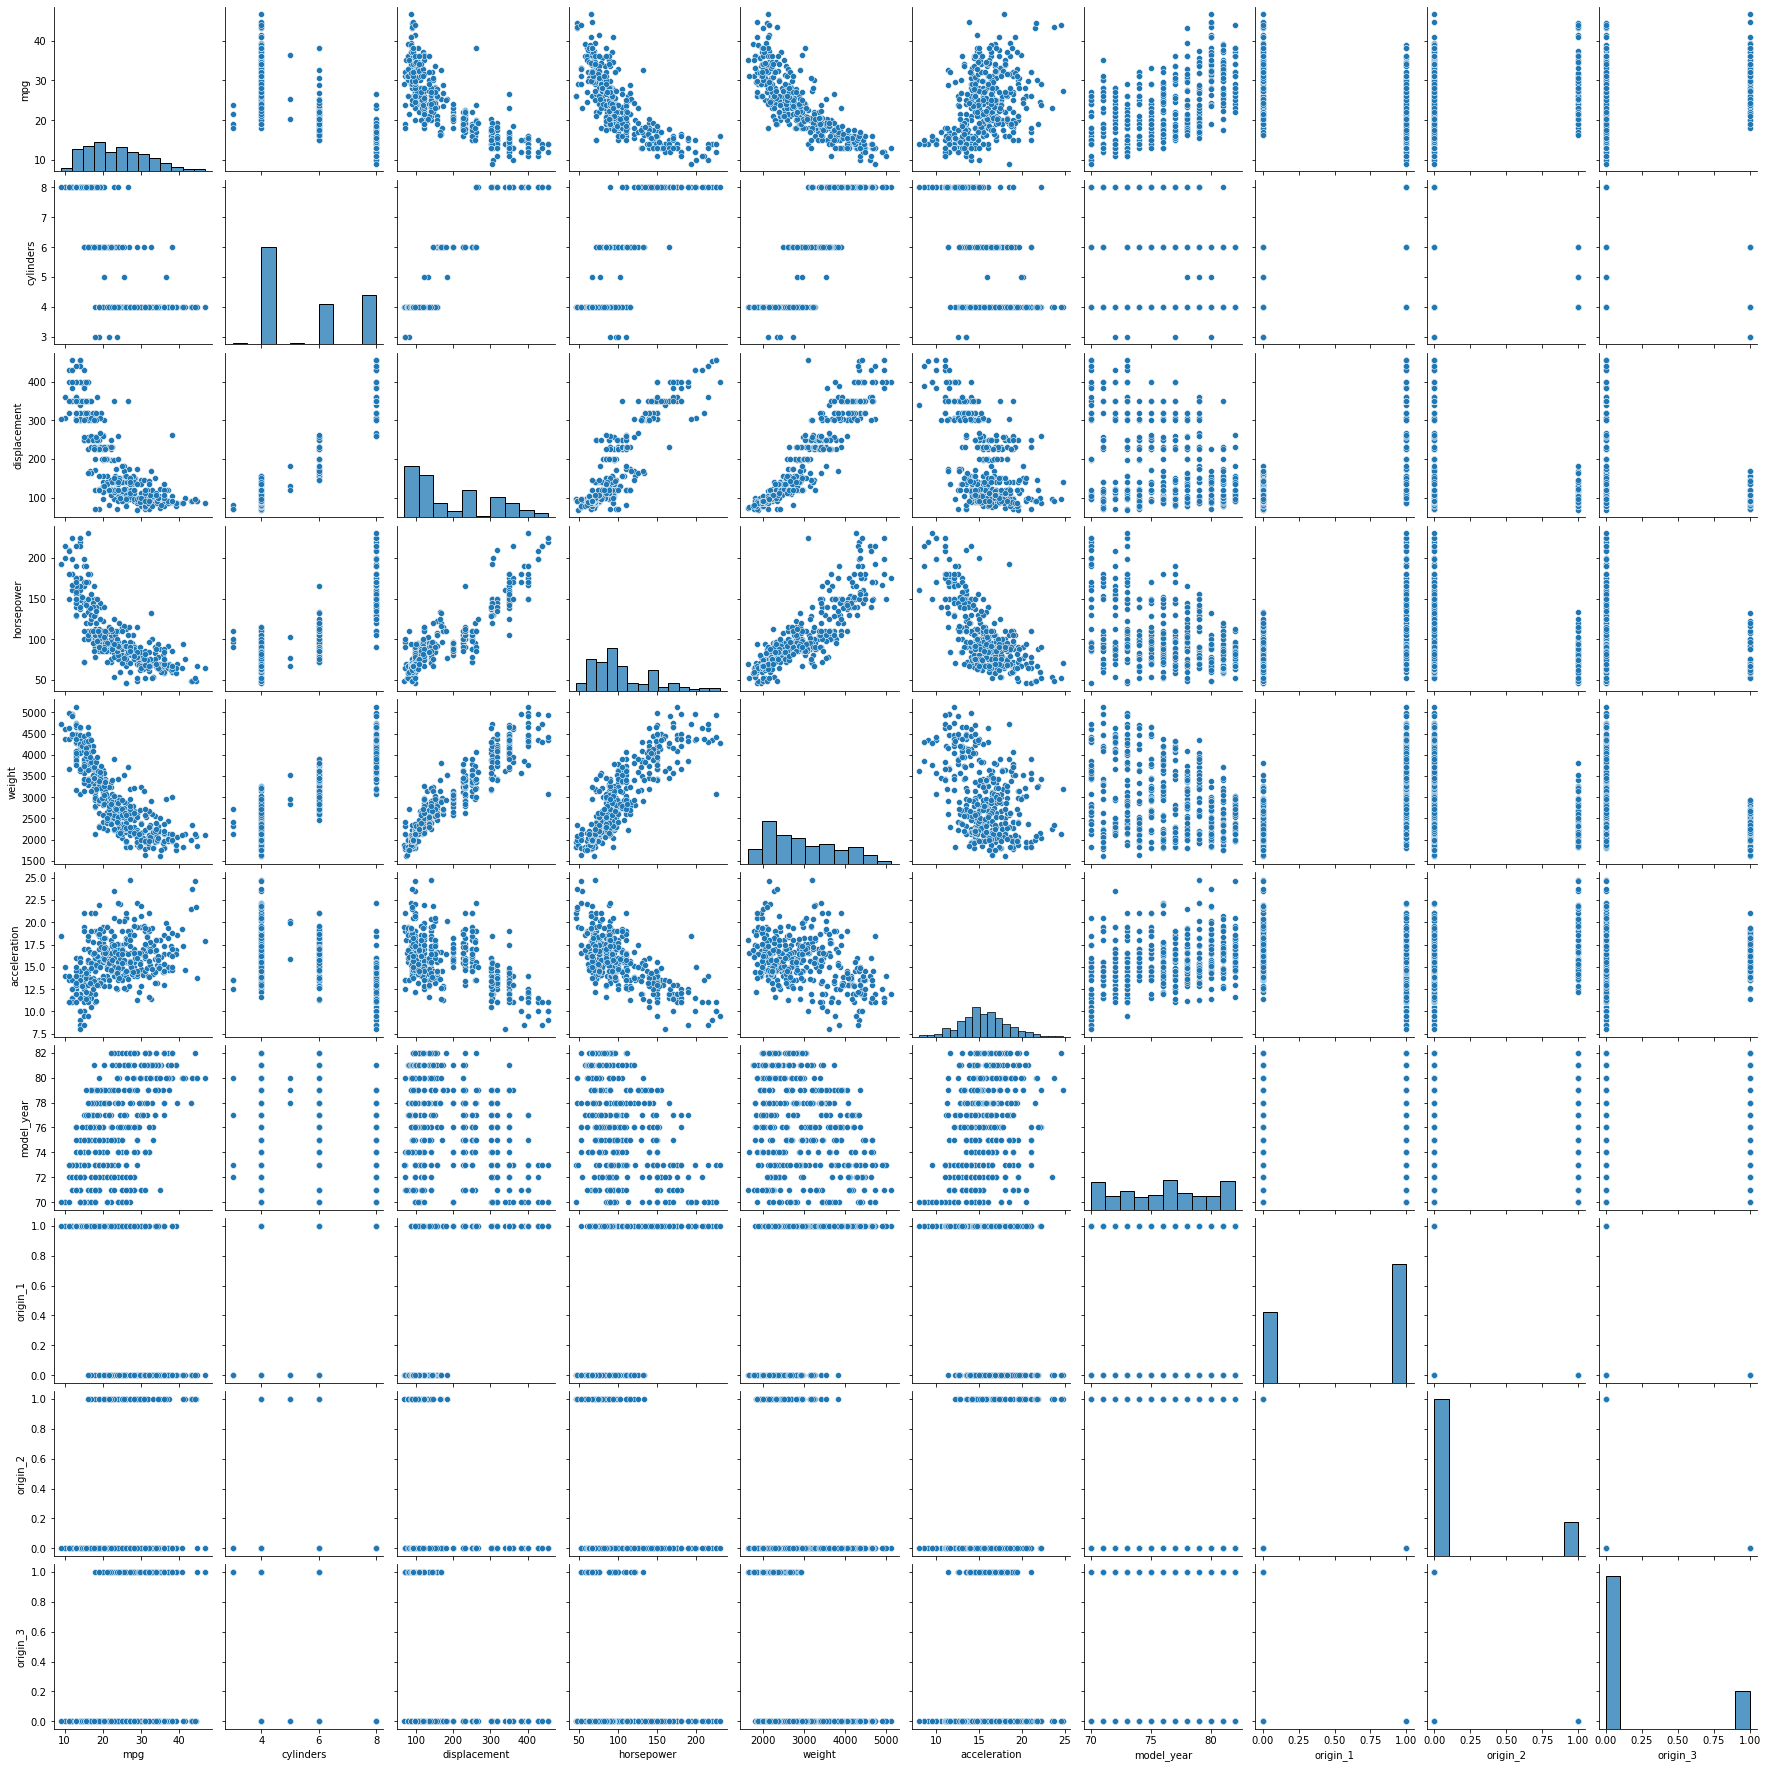

In [ ]:
sns.pairplot(auto)

Dependent variable: mpg - miles per gallon

#### ---> Correlation results:
- The 2 strongest correlations between the x variables and the dependent variable (y) are mpg and weight (- 0.83) and mpg and displacement (- 0.8), this means that if there is any variation in the weight or displacement values, the mpg value will change.
- The 2 weakest correlation between the x variables and the dependent variable (y) are mpg and origin_2 (0.26) and mpg and origin_3 (0.44), this means that if there is any variation in the origin_2 or origin_3 values, the mpg value is not going to be affected significantly.

#### ---> Scatterplot results:
- The relation between mpg and displacement, mpg and horsepower, and mpg and weight variables is negative. This means that as the values of displacement, horsepower, and weight increase, the value of mpg will decrease. Additionally, we can see that this relation could not be linear but polynomial because of the shape of the scatterplots.

#### ---> Histogram:
- The histogram of the mpg variable shows the data is skewed to the right.

4. Establish a linear regression model and interpret the results of the regression model. Note that split the dataset into 2 using a ratio of 80:20 as for training and testing sets. Train the regression model on training set.

#### - Simple Linear Regression Model:

In [ ]:
#Reshaping the variables
mpg = auto.mpg.values.reshape(len(auto['mpg']), 1)
cylinders = auto.cylinders.values.reshape(len(auto['cylinders']), 1)
displacement = auto.displacement.values.reshape(len(auto['displacement']), 1)
horsepower = auto.horsepower.values.reshape(len(auto['horsepower']), 1)
weight = auto.weight.values.reshape(len(auto['weight']), 1)
acceleration = auto.acceleration.values.reshape(len(auto['acceleration']), 1)
model = auto.model_year.values.reshape(len(auto['model_year']), 1)
origin1 = auto.origin_1.values.reshape(len(auto['origin_1']), 1)
origin2 = auto.origin_2.values.reshape(len(auto['origin_2']), 1)
origin3 = auto.origin_3.values.reshape(len(auto['origin_3']), 1)

In [ ]:
# Creating the simple linear regression model for each variable:

# Cylinders:
cylinder_model = LinearRegression()
cylinder_model.fit(cylinders, mpg)
coeffs_cylinder = np.array(list(cylinder_model.intercept_.flatten()) + list(cylinder_model.coef_.flatten()))
coeffs_cylinder = list(coeffs_cylinder)

# Displacement:
displacement_model = LinearRegression()
displacement_model.fit(displacement, mpg)
coeffs_displacement = np.array(list(displacement_model.intercept_.flatten()) + list(displacement_model.coef_.flatten()))
coeffs_displacement = list(coeffs_displacement)

# Horsepower:
horsepower_model = LinearRegression()
horsepower_model.fit(horsepower, mpg)
coeffs_horsepower = np.array(list(horsepower_model.intercept_.flatten()) + list(horsepower_model.coef_.flatten()))
coeffs_horsepower = list(coeffs_horsepower)

# Weight:
weight_model = LinearRegression()
weight_model.fit(weight, mpg)
coeffs_weight = np.array(list(weight_model.intercept_.flatten()) + list(weight_model.coef_.flatten()))
coeffs_weight = list(coeffs_weight)

# Acceleration:
acceleration_model = LinearRegression()
acceleration_model.fit(acceleration, mpg)
coeffs_acceleration = np.array(list(acceleration_model.intercept_.flatten()) + list(acceleration_model.coef_.flatten()))
coeffs_acceleration = list(coeffs_acceleration)

# Model:
model_model = LinearRegression()
model_model.fit(model, mpg)
coeffs_model = np.array(list(model_model.intercept_.flatten()) + list(model_model.coef_.flatten()))
coeffs_model = list(coeffs_model)

# Origin1:
origin_model1 = LinearRegression()
origin_model1.fit(origin1, mpg)
coeffs_origin1 = np.array(list(origin_model1.intercept_.flatten()) + list(origin_model1.coef_.flatten()))
coeffs_origin1 = list(coeffs_origin1)

# Origin2:
origin_model2 = LinearRegression()
origin_model2.fit(origin2, mpg)
coeffs_origin2 = np.array(list(origin_model2.intercept_.flatten()) + list(origin_model2.coef_.flatten()))
coeffs_origin2 = list(coeffs_origin2)

# Origin3:
origin_model3 = LinearRegression()
origin_model3.fit(origin3, mpg)
coeffs_origin3 = np.array(list(origin_model3.intercept_.flatten()) + list(origin_model3.coef_.flatten()))
coeffs_origin3 = list(coeffs_origin3)

In [ ]:
# R^2
cylinder_rsq = cylinder_model.score(cylinders, mpg)
displacement_rsq = displacement_model.score(displacement, mpg)
horsepower_rsq = horsepower_model.score(horsepower, mpg)
weight_rsq = weight_model.score(weight, mpg)
acceletarion_rsq = acceleration_model.score(acceleration, mpg)
model_rsq = model_model.score(model, mpg)
origin1_rsq = origin_model1.score(origin1, mpg)
origin2_rsq = origin_model2.score(origin2, mpg)
origin3_rsq = origin_model3.score(origin3, mpg)

rsq_results = [cylinder_rsq, displacement_rsq, horsepower_rsq, weight_rsq, acceletarion_rsq, model_rsq, origin1_rsq, origin2_rsq, origin3_rsq]

In [ ]:
# Results:

LRM_auto = {}
LRM_auto['cylinders'] = coeffs_cylinder
LRM_auto['displacement'] = coeffs_displacement
LRM_auto['horsepower'] = coeffs_horsepower
LRM_auto['weight'] = coeffs_weight
LRM_auto['acceleration'] = coeffs_acceleration
LRM_auto['model'] = coeffs_model
LRM_auto['origin_1'] = coeffs_origin1
LRM_auto['origin_2'] = coeffs_origin2
LRM_auto['origin_3'] = coeffs_origin3

metrics_auto = pd.DataFrame(LRM_auto, index = ['Intercept', 'Coefficient'])
metrics_auto.loc['R-squared'] = rsq_results
metrics_auto

,cylinders,displacement,horsepower,weight,acceleration,model,origin_1,origin_2,origin_3
Intercept,42.949314,35.174750,40.011318,46.317364,4.969793,-69.555602,29.248322,22.580488,21.796865
Coefficient,-3.562887,-0.060282,-0.158160,-0.007677,1.191205,1.224446,-9.164788,5.310941,8.653768
R-squared,0.601239,0.646742,0.598230,0.691793,0.176643,0.335550,0.322842,0.067092,0.195518


In [ ]:
# Plotting the variables:
def plot(variables):
    sns.jointplot( x = auto[variables], y = auto['mpg'], kind = 'reg', joint_kws={'line_kws':{'color':'cyan'}})

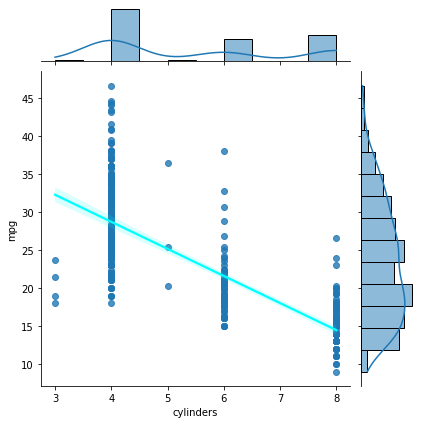

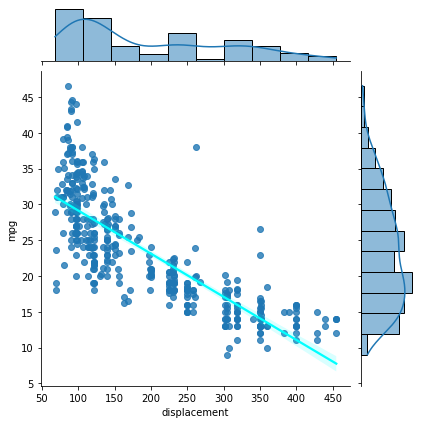

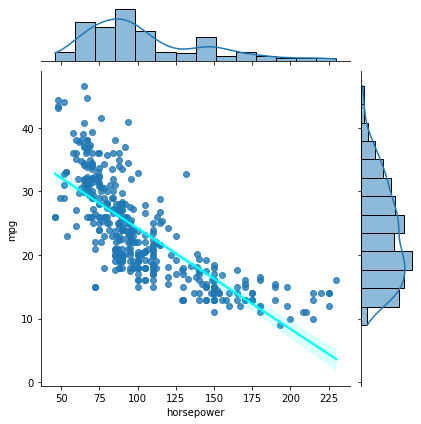

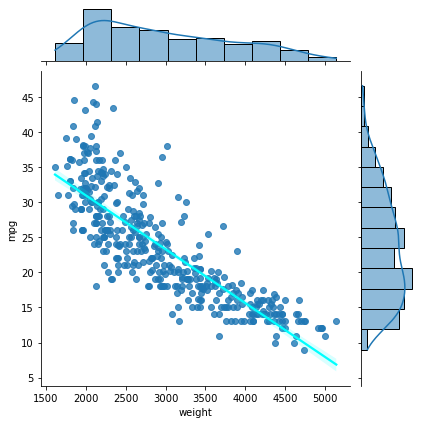

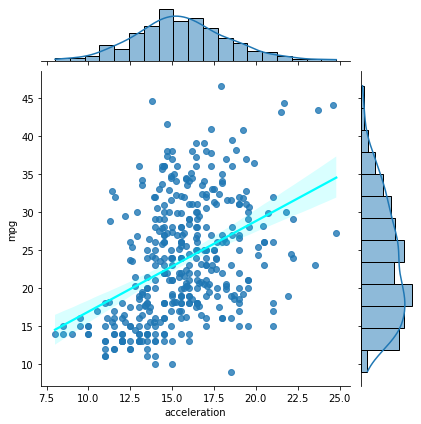

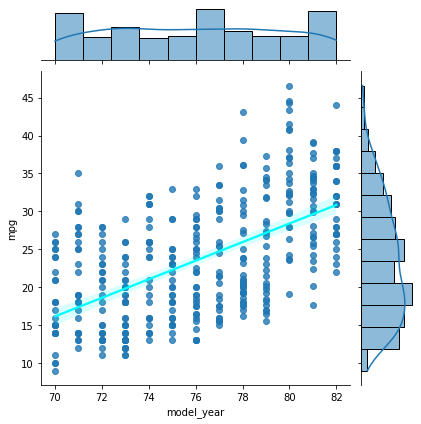

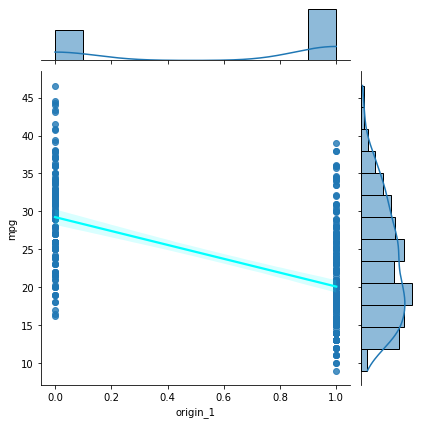

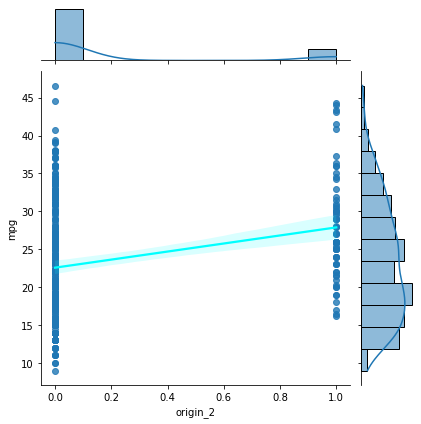

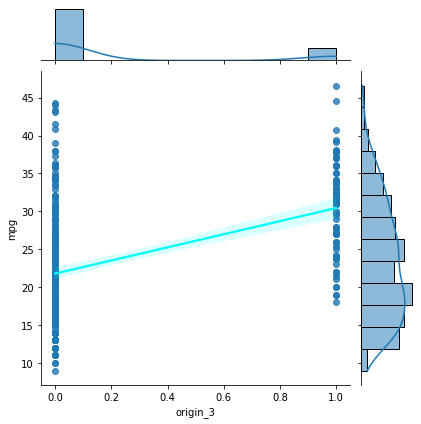

In [ ]:
NumVar = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']
for x in NumVar:
    plot(x)

---> Simple Linear Regression Model results:
- We can see that the weight variable has the highest R-squared value (0.69) followed by displacement (0.64), cylinders (0.60), and horsepower (0.59).
- The cylinder variable has the lowest coefficient which means that if this variable increases 1 unit, the miles per gallon variable will decrease 3.56 units.

#### - Multiple Linear Regression Model:

In [ ]:
# adding all predictors into the linear equation
MLR_model = LinearRegression()
MLR_model.fit(auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']], auto['mpg'])

LinearRegression()

In [ ]:
# Creating the predicted mpg variable and the error variable in the dataset
auto['mpg_predicted']  = MLR_model.predict(auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']])
auto['error'] = (auto['mpg_predicted'] - auto['mpg'])**2

In [ ]:
# Calculating the Mean Squared Error (MSE) of the model
MSE_MLR = auto['error'].mean()
MSE_MLR

10.693365170783139

In [ ]:
MLR_Rsq = MLR_model.score(auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']], auto['mpg'])
MLR_Rsq

0.8245151595573863

In [ ]:
# Detailed information of the MLR model:

mlr = smf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + origin_1 + origin_2 + origin_3', data = auto).fit()
mlr.params
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          7.19e-142
Time:                        23:49:26   Log-Likelihood:                -1036.3
No. Observations:                 398   AIC:                             2091.
Df Residuals:                     389   BIC:                             2126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.6378      3.431     -3.684   

---> Multiple Linear Regression Model results:
- The p- values with the lowest statistical significance are acceleration (0.323), followed by horsepower (0.285) and cylinders (0.186)
- The R-square of the Multiple Linear Regression Model is 0.825 which is better than the result that we had in the Simple Linear Regression Model.
- MSE: The average squared error for the model is 10.69.
- I will evaluate if the multicollinearity is affecting the performance of the model.

#### - Splitting the data to Train the regression model on training set:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']]
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 3, train_size = 0.80)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 9), (80, 9), (318,), (80,))

In [ ]:
y_pred = regressor.predict(X_test)
X_test['y_pred'] = y_pred
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3,y_pred
358,4,120.0,74.0,2635.0,18.3,81,0,0,1,31.385779
16,6,199.0,97.0,2774.0,15.5,70,1,0,0,19.179428
292,8,360.0,150.0,3940.0,13.0,79,1,0,0,20.388007
81,4,97.0,92.0,2288.0,17.0,72,0,0,1,25.461802
112,4,122.0,85.0,2310.0,18.5,73,1,0,0,23.892581


5. Check the performance of the regression on the test set, using RMSE and MAE indicators.
Make a conclusion on the performance of the model.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared:", regressor.score(X_train, y_train))

Mean Absolute Error (MAE): 2.740746743150228
Mean Squared Error (MSE): 12.518187511317587
Root Mean Squared Error (RMSE): 3.5381050735270123
R-Squared: 0.8289744039908353


---> Checking the performance of the Multiple Linear Model on the test, we have that the MAE = 2.74, MSE = 12.51 and RMSE = 3.53, if we compare this MSE with the MSE value of the Multiple Linear Regression (10.69) we could see this value increased, but at the same time, the R-Squeated passed from 0.8245 to 0.8289.

#### ---> Improving the model:

In order to verify the notes in the mlr.summary() about multicollinearity, I will use the Variance Inflation Factor(VIF), this technique allows me to verify if two or more explanatory variables are highly correlated with each other, such that they do not provide unique or independent information in the regression model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns
vif

,VIF,variable
0,10.696878,cylinders
1,23.005113,displacement
2,9.476081,horsepower
3,10.804647,weight
4,2.553992,acceleration
5,1.290936,model_year
6,483.249651,origin_1
7,131.904827,origin_2
8,153.305041,origin_3


Due to the high VIF value of the origin_1 variable, I will drop this column to evaluate the new performance of the model.

In [ ]:
mlr2 = smf.ols(formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + origin_2 + origin_3', data = auto).fit()
mlr2.params
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          7.19e-142
Time:                        23:49:26   Log-Likelihood:                -1036.3
No. Observations:                 398   AIC:                             2091.
Df Residuals:                     389   BIC:                             2126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.7274      4.608     -4.064   

In [ ]:
x2 = auto[['cylinders','displacement','horsepower', 'weight', 'acceleration', 'model_year', 'origin_2', 'origin_3']]
y2 = auto['mpg']
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, random_state = 3, train_size = 0.80)

In [ ]:
regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
y2_pred = regressor2.predict(X2_test)
X2_test['y2_pred'] = y2_pred
X2_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_2,origin_3,y2_pred
358,4,120.0,74.0,2635.0,18.3,81,0,1,31.385779
16,6,199.0,97.0,2774.0,15.5,70,0,0,19.179428
292,8,360.0,150.0,3940.0,13.0,79,0,0,20.388007
81,4,97.0,92.0,2288.0,17.0,72,0,1,25.461802
112,4,122.0,85.0,2310.0,18.5,73,0,0,23.892581
...,...,...,...,...,...,...,...,...,...
10,8,383.0,170.0,3563.0,10.0,70,0,0,15.933338
114,4,98.0,90.0,2265.0,15.5,73,1,0,25.990893
74,8,302.0,140.0,4294.0,16.0,72,0,0,11.334949
193,6,200.0,81.0,3012.0,17.6,76,0,0,22.861516


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("R-Squared:", regressor2.score(X2_train, y2_train))

Mean Absolute Error (MAE): 2.7407467431502335
Mean Squared Error (MSE): 12.518187511317647
Root Mean Squared Error (RMSE): 3.538105073527021
R-Squared: 0.8289744039908353


---> We can see that if we remove the variable 'origin_1' of the model, the values of the MAE, MSE, RMSE, and R-Squeated do not change, we could say this variable does not affect the model performance.